In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 24.3MB/s]
100% 163M/163M [00:08<00:00, 21.1MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1581.jpg', 'with_mask_1932.jpg', 'with_mask_1982.jpg', 'with_mask_434.jpg', 'with_mask_3656.jpg']
['with_mask_2483.jpg', 'with_mask_1887.jpg', 'with_mask_3512.jpg', 'with_mask_2361.jpg', 'with_mask_2670.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3403.jpg', 'without_mask_679.jpg', 'without_mask_2559.jpg', 'without_mask_3285.jpg', 'without_mask_1696.jpg']
['without_mask_1082.jpg', 'without_mask_1534.jpg', 'without_mask_1654.jpg', 'without_mask_2579.jpg', 'without_mask_3804.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

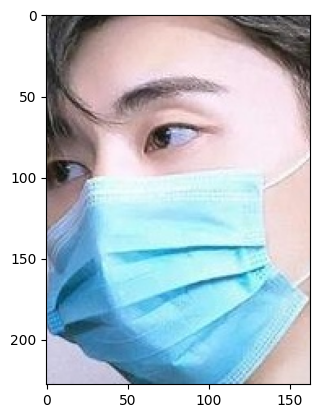

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

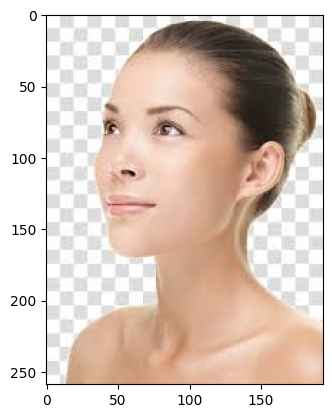

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[249, 254, 243],
        [254, 250, 255],
        [255, 249, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 252, 216],
        [249, 247, 160],
        [252, 247, 142],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[249, 248, 174],
        [240, 240,  30],
        [251, 241,   3],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[246, 249, 250],
        [216, 220, 222],
        [182, 185, 191],
        ...,
        [194, 194, 196],
        [183, 184, 186],
        [195, 195, 197]],

       [[244, 249, 250],
        [228, 233, 237],
        [196, 200, 206],
        ...,
        [187, 186, 191],
        [182, 182, 186],
        [201, 201, 205]],

       [[244, 251, 252],
        [228, 235, 241],
        [218, 223, 229],
        ...,
        [199, 198, 204],
        [211, 210, 217],
        [231, 230, 235]]], dtype=uint8)
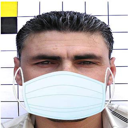

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[63, 65, 51],
        [51, 53, 39],
        [44, 45, 31],
        ...,
        [70, 55, 36],
        [69, 55, 36],
        [67, 56, 36]],

       [[52, 52, 36],
        [44, 44, 28],
        [38, 38, 22],
        ...,
        [72, 58, 41],
        [70, 57, 40],
        [68, 57, 39]],

       [[47, 44, 26],
        [43, 41, 22],
        [41, 38, 22],
        ...,
        [69, 57, 42],
        [69, 56, 42],
        [72, 59, 44]],

       ...,

       [[78, 61, 55],
        [75, 61, 55],
        [71, 60, 58],
        ...,
        [34, 36, 35],
        [40, 42, 41],
        [47, 52, 48]],

       [[84, 67, 59],
        [81, 66, 60],
        [77, 65, 62],
        ...,
        [27, 29, 28],
        [29, 32, 30],
        [38, 44, 40]],

       [[88, 70, 63],
        [85, 70, 63],
        [81, 69, 65],
        ...,
        [24, 26, 25],
        [25, 28, 27],
        [31, 37, 33]]], dtype=uint8)
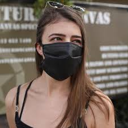

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.24705882, 0.25490196, 0.2       ],
        [0.2       , 0.20784314, 0.15294118],
        [0.17254902, 0.17647059, 0.12156863],
        ...,
        [0.2745098 , 0.21568627, 0.14117647],
        [0.27058824, 0.21568627, 0.14117647],
        [0.2627451 , 0.21960784, 0.14117647]],

       [[0.20392157, 0.20392157, 0.14117647],
        [0.17254902, 0.17254902, 0.10980392],
        [0.14901961, 0.14901961, 0.08627451],
        ...,
        [0.28235294, 0.22745098, 0.16078431],
        [0.2745098 , 0.22352941, 0.15686275],
        [0.26666667, 0.22352941, 0.15294118]],

       [[0.18431373, 0.17254902, 0.10196078],
        [0.16862745, 0.16078431, 0.08627451],
        [0.16078431, 0.14901961, 0.08627451],
        ...,
        [0.27058824, 0.22352941, 0.16470588],
        [0.27058824, 0.21960784, 0.16470588],
        [0.28235294, 0.23137255, 0.17254902]],

       ...,

       [[0.30588235, 0.23921569, 0.21568627],
        [0.29411765, 0.23921569, 0.21568627],
        [0.27843137, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 28ms/step - loss: 0.4548 - acc: 0.8014 - val_loss: 0.2694 - val_acc: 0.8744
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2732 - acc: 0.8919 - val_loss: 0.2363 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2207 - acc: 0.9148 - val_loss: 0.2187 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1890 - acc: 0.9296 - val_loss: 0.2094 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1532 - acc: 0.9426 - val_loss: 0.1959 - val_acc: 0.9223


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2233 - acc: 0.9212
Test Accuracy = 0.921244204044342


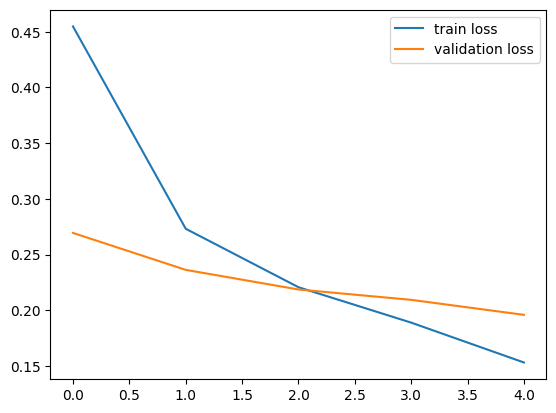

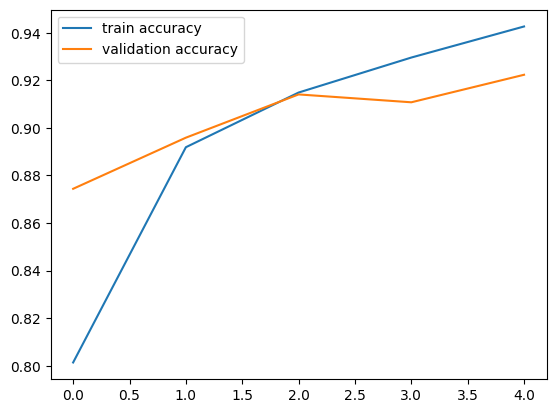

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/0_0_aidai_0074.jpg


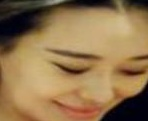

1/1 [==============================] - 0s 18ms/step
[[0.2751156  0.83023566]]
1
The person in the image is not wearing a mask


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/0_0_0 copy 20.jpg


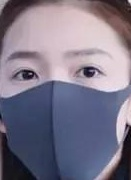

1/1 [==============================] - 0s 28ms/step
[[0.86578715 0.24978016]]
0
The person in the image is wearing a mask


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not  wearing a mask')

else:

  print('The person in the image is wearing a mask')